In [39]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [40]:
def deg_to_rad(angle):
    return angle * m.pi / 180

In [64]:
############################################
############ Fixed Parameters ##############
############################################

C = 6_000 # Pa
phi = deg_to_rad(38) # radians
pw = 1_000 # kg/m^3
ps = 1_800 # kg/m^3
h_over_z = 0.8 # proportion of saturated soil
g = 9.81 # m/s^s
D = 0.004 # m^2/yr
Sc = 1.25
start_alpha = 30 # degrees
alpha_interval = 0.05 # degrees

In [42]:
def z_crit(theta, C=C, ps=ps, g=g, phi=phi, pw=pw, h_over_z=h_over_z):
    cos2_theta = m.cos(theta) ** 2
    tan_theta = m.tan(theta)
    tan_phi = m.tan(phi)
    pw_over_ps = pw / ps
    return C / (ps * g * cos2_theta * (tan_theta - tan_phi * (1 - (h_over_z * pw_over_ps))))

In [43]:
def get_K(D, alpha, Sc):
    tan_alpha = m.tan(alpha)
    return D / (1 - ((tan_alpha / Sc) ** 2))

In [44]:
def get_beta(theta, alpha):
    cos_theta = m.cos(theta)
    cos2_theta = cos_theta ** 2
    tan2_theta = m.tan(theta) ** 2
    tan2_alpha = m.tan(alpha) ** 2
    cos2_alpha = m.cos(alpha) ** 2
    
    return m.sqrt((cos_theta) * m.sqrt(tan2_alpha - tan2_theta) * m.sqrt((cos2_theta / cos2_alpha) - 1))

In [45]:
def get_theta(alpha):
    return 0.8 * alpha

In [46]:
def recurrence_interval(zc, K, beta):
    return (zc ** 2) / (2 * K * (beta ** 2))

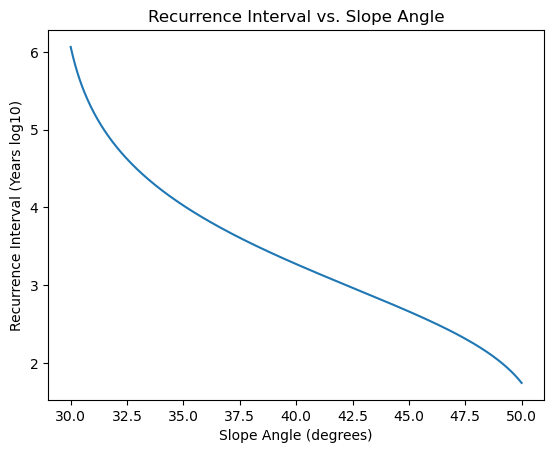

In [134]:
n = int((50-start_alpha) / alpha_interval) + 1
alphas = np.arange(start_alpha, 50+alpha_interval, alpha_interval)
alpha_rads = deg_to_rad(alphas)
recurrence_intervals = np.zeros(n, dtype=float)

i = 0
for alpha in alpha_rads:
    theta = get_theta(alpha)
    beta = get_beta(theta, alpha)
    K = get_K(D, alpha, Sc)
    zc = z_crit(theta)
    
    recurrence_intervals[i] = m.log(recurrence_interval(zc, K, beta), 10)
    
    i += 1

plt.plot(alphas, recurrence_intervals)
plt.title("Recurrence Interval vs. Slope Angle")
plt.ylabel("Recurrence Interval (Years log10)")
plt.xlabel("Slope Angle (degrees)");

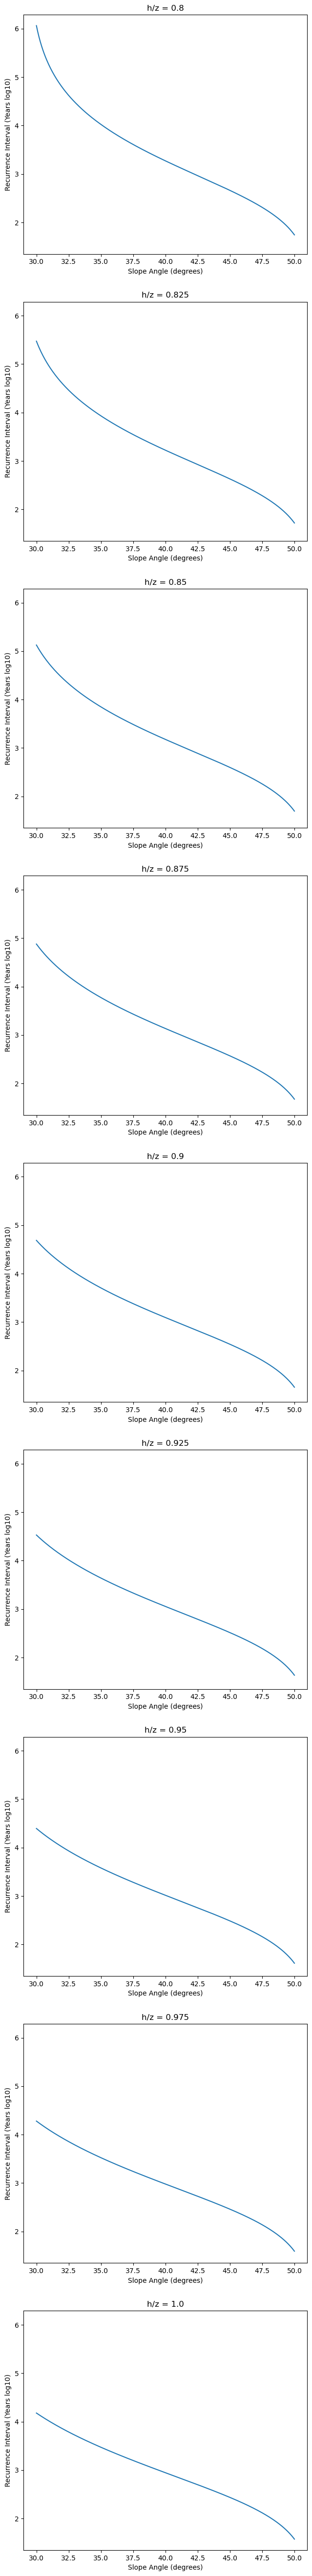

In [146]:
n = int((50-start_alpha) / alpha_interval) + 1
alphas = np.arange(start_alpha, 50+alpha_interval, alpha_interval)
alpha_rads = deg_to_rad(alphas)

k = 0
l = 0
fig,ax = plt.subplots(figsize=(7.5, 7.5*9), nrows=9, ncols=1, sharey=True)
for j in np.arange(0.8, 1.01, .025):
    i = 0
    recurrence_intervals = np.zeros(n, dtype=float)
    for alpha in alpha_rads:
        theta = get_theta(alpha)
        beta = get_beta(theta, alpha)
        K = get_K(D, alpha, Sc)
        zc = z_crit(theta, h_over_z=j)

        recurrence_intervals[i] = m.log(recurrence_interval(zc, K, beta), 10)
        
        i += 1
    ax[k].plot(alphas, recurrence_intervals)
    ax[k].set_title(f"h/z = {np.round(j, 3)}")
    ax[k].set_xlabel("Slope Angle (degrees)")
    ax[k].set_ylabel("Recurrence Interval (Years log10)")
    k += 1

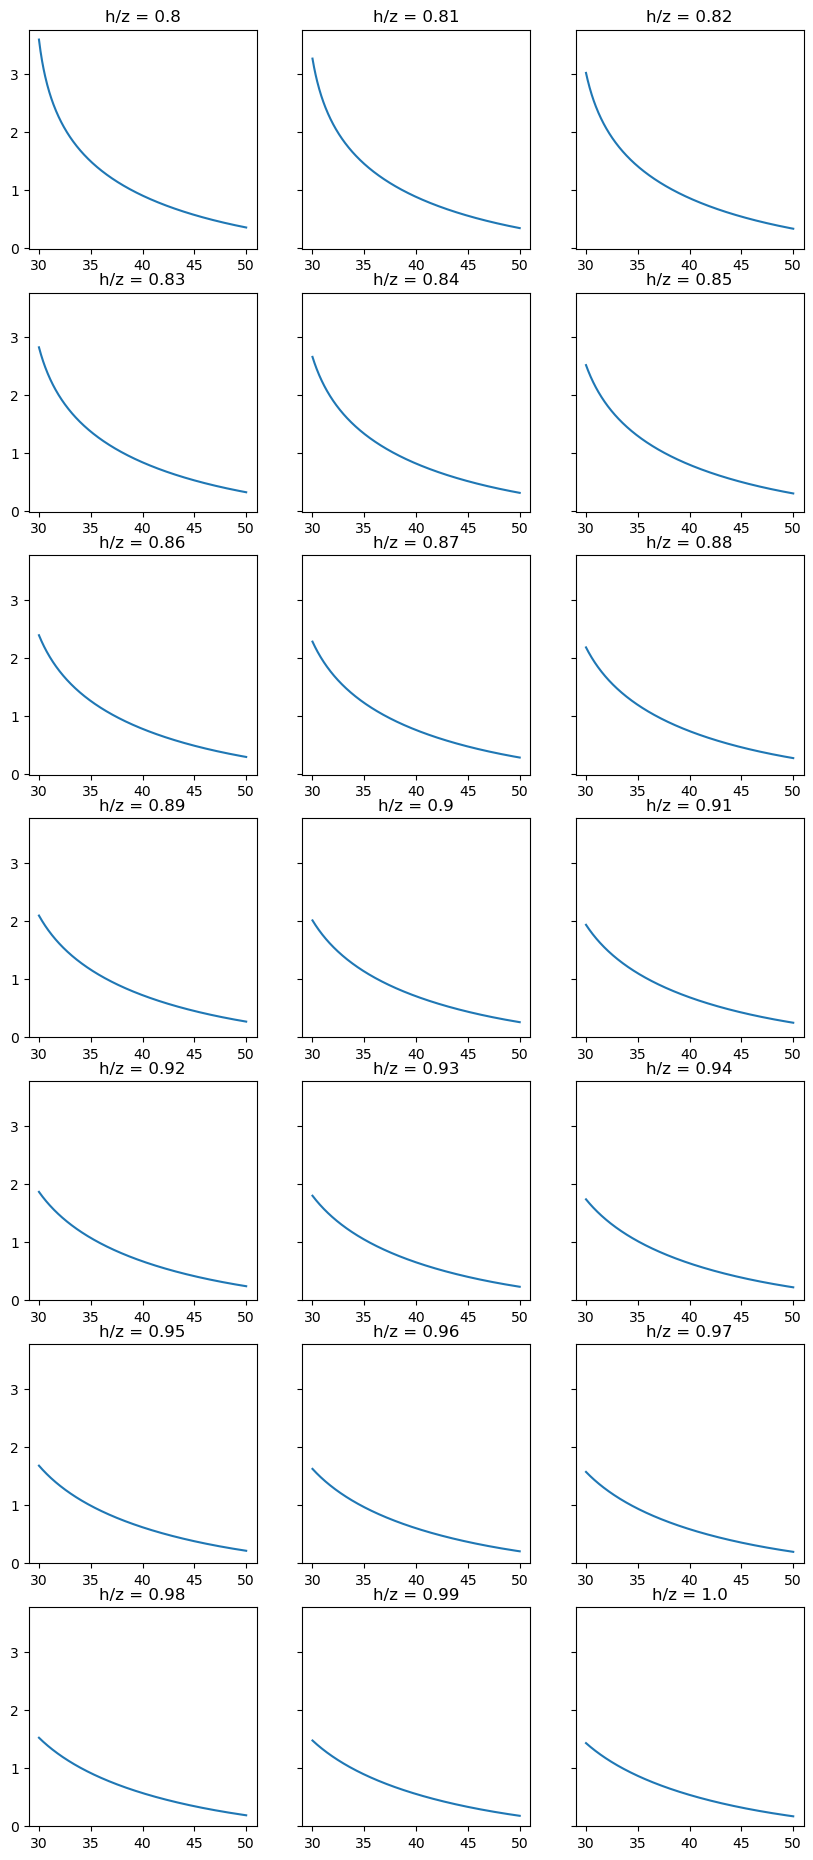

In [148]:
n = int((50-start_alpha) / alpha_interval) + 1
alphas = np.arange(start_alpha, 50+alpha_interval, alpha_interval)
alpha_rads = deg_to_rad(alphas)

k = 0
l = 0
fig,ax = plt.subplots(figsize=(10, 10*7/3), nrows=7, ncols=3, sharey=True)
for j in np.arange(0.8, 1.01, .01):
    i = 0
    recurrence_intervals = np.zeros(n, dtype=float)
    for alpha in alpha_rads:
        theta = get_theta(alpha)
        beta = get_beta(theta, alpha)
        K = get_K(D, alpha, Sc)
        zc = z_crit(theta, h_over_z=j)

        recurrence_intervals[i] = m.log(zc)

        i += 1
    ax[l][k].plot(alphas, recurrence_intervals)
    ax[l][k].set_title(f"h/z = {np.round(j, 2)}")
    k += 1
    if (k % 3 == 0):
        l += 1
        k = 0